In [ ]:
pip install pandas numpy matplotlib seaborn yfinance statsmodels tensorflow


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
# Fetch data for Tesla (TSLA) stock
df = yf.download('TSLA', start='2015-01-01', end='2023-12-31')
print(df.head())


[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open    Volume
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA      TSLA
Date                                                                       
2015-01-02  14.620667  14.620667  14.883333  14.217333  14.858000  71466000
2015-01-05  14.006000  14.006000  14.433333  13.810667  14.303333  80527500
2015-01-06  14.085333  14.085333  14.280000  13.614000  14.004000  93928500
2015-01-07  14.063333  14.063333  14.318667  13.985333  14.223333  44526000
2015-01-08  14.041333  14.041333  14.253333  14.000667  14.187333  51637500


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  2264 non-null   float64
 1   (Close, TSLA)      2264 non-null   float64
 2   (High, TSLA)       2264 non-null   float64
 3   (Low, TSLA)        2264 non-null   float64
 4   (Open, TSLA)       2264 non-null   float64
 5   (Volume, TSLA)     2264 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 123.8 KB
None
Price     Adj Close        Close         High          Low         Open  \
Ticker         TSLA         TSLA         TSLA         TSLA         TSLA   
count   2264.000000  2264.000000  2264.000000  2264.000000  2264.000000   
mean     102.886245   102.886245   105.189681   100.463745   102.914519   
std      110.936400   110.936400   113.516631   108.293623   111.036323   
min        9.578000     9.578000    10.331333     9.403333  

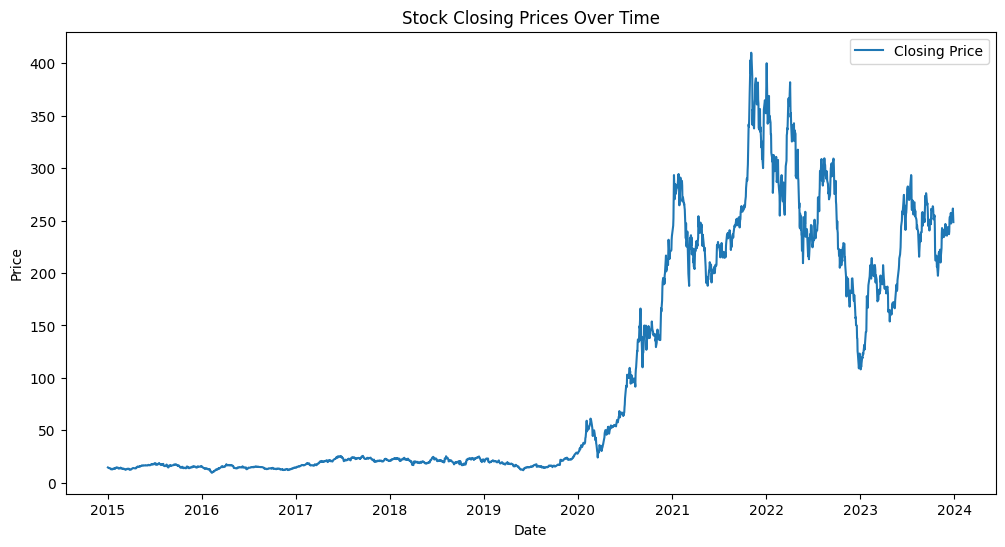

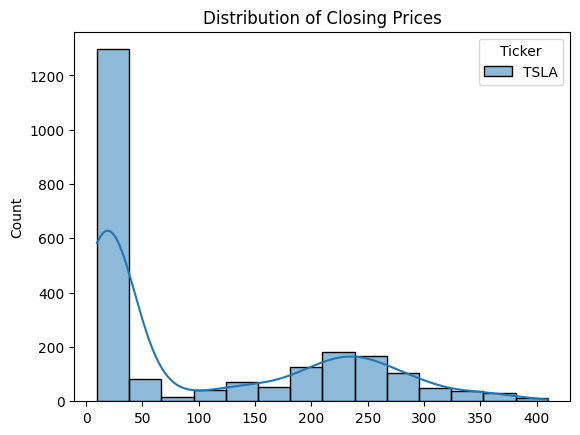

In [ ]:
# Basic information
print(df.info())

# Summary statistics
print(df.describe())

# Plot stock prices
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Visualize distribution of closing prices
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Closing Prices')
plt.show()


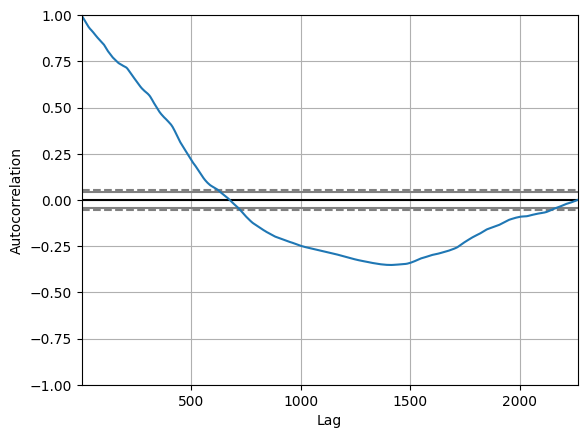

In [ ]:
# Use only the 'Close' column for time series analysis
stock_prices = df['Close']

# Plot autocorrelation to check for seasonality
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(stock_prices)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   TSLA   No. Observations:                 2264
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -7148.207
Date:                Thu, 26 Dec 2024   AIC                          14308.413
Time:                        12:34:06   BIC                          14342.760
Sample:                             0   HQIC                         14320.946
                               - 2264                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0279      0.012     -2.269      0.023      -0.052      -0.004
ar.L2          0.0128      0.011      1.193      0.233      -0.008       0.034
ar.L3         -0.0077      0.014     -0.564      0.5

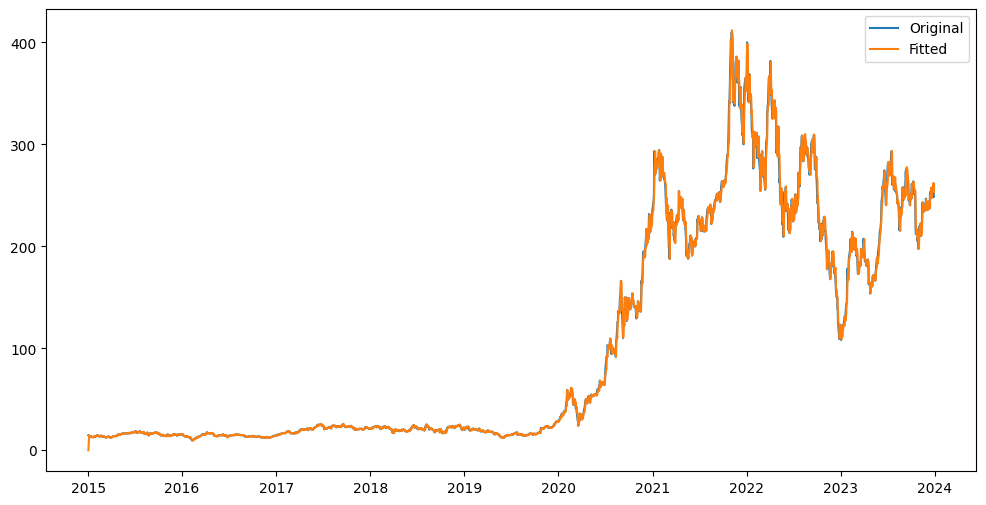

In [ ]:
# Fit ARIMA model
model = ARIMA(stock_prices, order=(5, 1, 0))  # (p, d, q)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(stock_prices, label='Original')
plt.plot(model_fit.fittedvalues, label='Fitted')
plt.legend()
plt.show()


In [ ]:
forecast = model_fit.forecast(steps=30)  # Predict the next 30 days
print(forecast)


2264    248.747291
2265    248.973959
2266    248.427724
2267    248.285967
2268    248.370822
2269    248.380473
2270    248.345514
2271    248.345839
2272    248.352696
2273    248.352041
2274    248.349862
2275    248.350427
2276    248.350801
2277    248.350668
2278    248.350549
2279    248.350617
2280    248.350628
2281    248.350616
2282    248.350610
2283    248.350616
2284    248.350616
2285    248.350615
2286    248.350615
2287    248.350615
2288    248.350615
2289    248.350615
2290    248.350615
2291    248.350615
2292    248.350615
2293    248.350615
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Scale data to 0-1 range
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_prices.values.reshape(-1, 1))

# Prepare training and testing data
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create sequences
def create_sequences(data, sequence_length=50):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(x), np.array(y)

sequence_length = 50
x_train, y_train = create_sequences(train_data, sequence_length)
x_test, y_test = create_sequences(test_data, sequence_length)


In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0253
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 9.1713e-04
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 8.1299e-04
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - loss: 7.1592e-04
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - loss: 6.6936e-04
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 5.8933e-04
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 7.3457e-04
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 5.2568e-04
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 5.7520e-04
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 5.2270e-04


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step


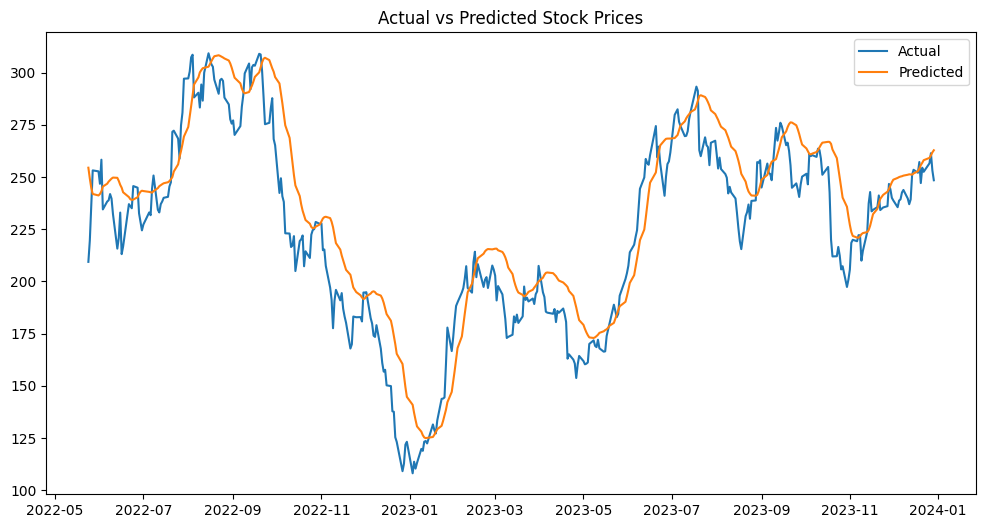

In [ ]:
# Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(stock_prices.index[-len(y_test):], scaler.inverse_transform(y_test), label='Actual')
plt.plot(stock_prices.index[-len(predictions):], predictions, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.show()
